<a href="https://colab.research.google.com/github/AV-Gorshkov/Python_netology/blob/main/PY_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание.

 * Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
 * Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
 * Разделите данные на выборку для обучения и тестирования
 * Постройте модель LDA
 * Визуализируйте предсказания для тестовой выборки и центры классов
 * Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
 * Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [14]:
# импорт библиотек

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import itertools
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# датасет с цветками iris’а (из библиотеки sklearn)

iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# сформируем датафрейм из двух признаков - sepal_length и sepal_width

df = pd.DataFrame(iris.data,  columns=iris.feature_names)
df_iris = df[['sepal length (cm)', 'sepal width (cm)']]

df_iris.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


<Axes: title={'center': 'Распределение длины от ширины чашелистика'}, xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

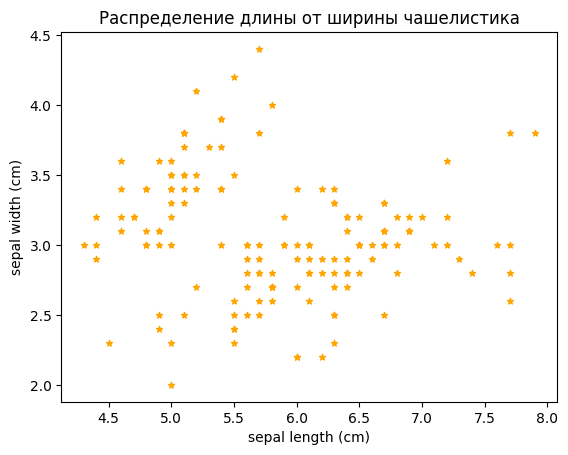

In [4]:
# посмотрим на взаимосвязь признаков

df_iris.plot(kind='scatter',
        x = 'sepal length (cm)',
        y = 'sepal width (cm)',
        title='Распределение длины от ширины чашелистика',
        color='orange',
        marker='*'
        )

In [5]:
# целевая переменная
iris_class = iris.target
iris_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# разделим данные на выборку для обучения и тестирования

X_train, X_test, y_train, y_test = train_test_split(df_iris, iris_class, train_size=0.25)

In [7]:
# построим модель LDA

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# прогноз на тестовой выборке
y_pred = lda.predict(X_test)

print(y_pred)

[2 0 1 1 2 1 0 2 2 0 2 1 0 2 1 1 0 0 1 1 0 1 0 0 1 1 2 0 0 1 0 2 1 1 2 2 1
 2 1 0 1 1 0 2 1 1 1 1 1 2 1 1 0 1 0 1 0 1 1 0 2 2 0 1 1 1 0 1 1 0 0 0 0 1
 2 0 0 0 1 2 0 0 0 1 2 0 0 2 2 2 0 0 1 0 0 2 1 1 1 1 2 1 1 1 0 0 1 1 1 2 2
 1 2]


In [8]:
# разница факта и прогноза
df_result = pd.DataFrame( [y_test, y_pred]).transpose()
df_result.columns =['test', 'pred']

df_result.head(7)

,test,pred
0,2,2
1,0,0
2,2,1
3,1,1
4,2,2
5,1,1
6,0,0


Confusion matrix, without normalization
[[38  1  0]
 [ 0 28  7]
 [ 0 20 19]]


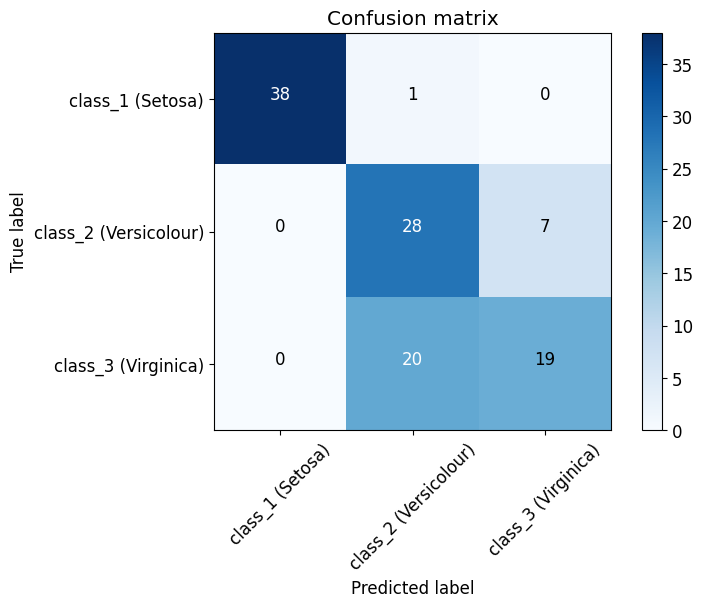

In [9]:
#  матрица ошибок
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 12}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=['class_1 (Setosa)', 'class_2 (Versicolour)', 'class_3 (Virginica)'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

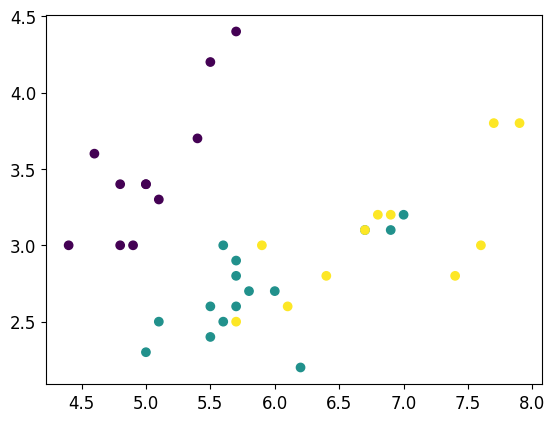

In [10]:
# визуализируем дискриминантные линии только по 2 признакам
small_train = X_train[ ['sepal length (cm)', 'sepal width (cm)']]
small_test = X_test[ ['sepal length (cm)', 'sepal width (cm)']]

plt.scatter(x=small_train['sepal length (cm)'], y=small_train['sepal width (cm)'], c=y_train)
plt.show()

In [11]:
# определим центры классов

lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, y_train)

lda_small.means_

array([[5.01818182, 3.49090909],
       [5.86666667, 2.70666667],
       [6.82727273, 3.07272727]])

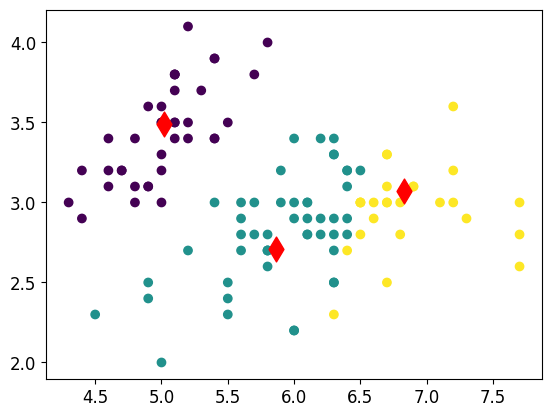

In [12]:
# прогноз на тестовой выборке
y_small_pred = lda_small.predict(small_test)

# визуализируем предсказания для тестовой выборки и центры классов

plt.scatter( x=small_test['sepal length (cm)'], y=small_test['sepal width (cm)'], c=y_small_pred )

# центры классов
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='red', s=160, marker='d')
plt.show()

In [15]:
# точность модели LDA

print( 'accuracy', accuracy_score(y_test, y_pred) )
print( 'precision', precision_score(y_test, y_pred, average='weighted') )
print( 'recall', recall_score(y_test, y_pred, average='weighted') )
print( 'f1', f1_score(y_test, y_pred, average='weighted') )

accuracy 0.7522123893805309
precision 0.7743362831858407
recall 0.7522123893805309
f1 0.7489100869631842


Точность модели LDA:
 - общая точность модели accuracy = 0,787
 - значение F-мера = 0,782

На выходе получили модель среднего качества для предсказания событий
(точность - 78% )

In [16]:
# Кластеризация
# # сформируем датафрейм из двух признаков - sepal_length и sepal_width

df_iris.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

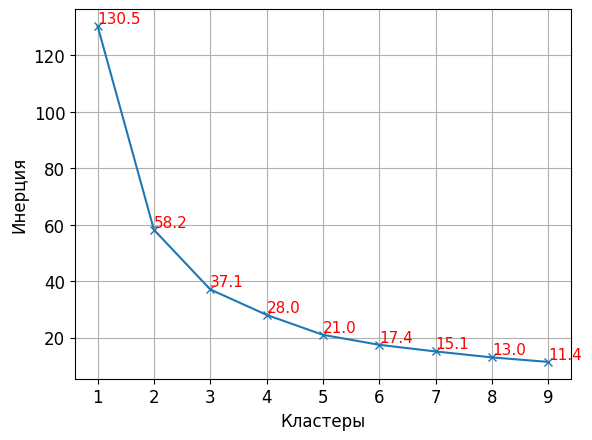

In [17]:
# подберите оптимальное число кластеров для алгоритма kmeans

# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов и возвращает инерцию

def get_inertia(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num,  random_state=42)
    k_means.fit(X)
    inertia = k_means.inertia_
    return inertia

inertia = []
for cluster_num in range(1, 10):
    inertia.append(get_inertia(cluster_num, df_iris))

# визуализируем, как менялась инерция в зависимости от количества кластеров
plt.xlabel("Кластеры", fontsize=12)
plt.ylabel("Инерция", fontsize=12)
plt.plot([i for i in range(1, 10)], inertia, '-x')
plt.grid()
for i, val in enumerate(inertia):
  plt.text( i+1, val, round(float(val), 1), horizontalalignment='left', verticalalignment='bottom', fontdict={'size':11}, color='red')
plt.show()

Инерция сильно падает при увеличении числа кластеров с 1 до 2 и с 2 до 3. При изменении числа кластеров с 3 до 4 - слабее. Далее (более 5 классов) - изменение инерции практически незначительно. Зададим 4 класса и постоим модель кластеризации.

In [18]:
# модель кластеризации k-means с количеством кластеров 4

kmeans = KMeans(n_clusters=4, random_state=42)
predictions = kmeans.fit_predict(df_iris)

# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# добавим предсказание в датафрейм
df_iris['Class'] = predictions

df_iris.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-18-4821474af812>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iris['Class'] = predictions


,sepal length (cm),sepal width (cm),Class
0,5.1,3.5,3
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,3


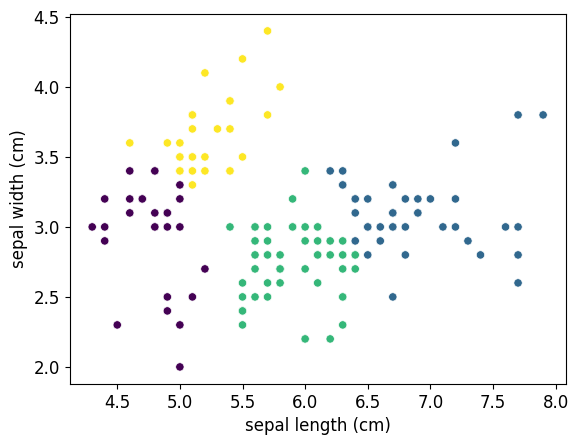

In [19]:
# визуализируем распределние по классам
sns.scatterplot(x=df_iris['sepal length (cm)'], y=df_iris['sepal width (cm)'], c=df_iris['Class'])
plt.show()

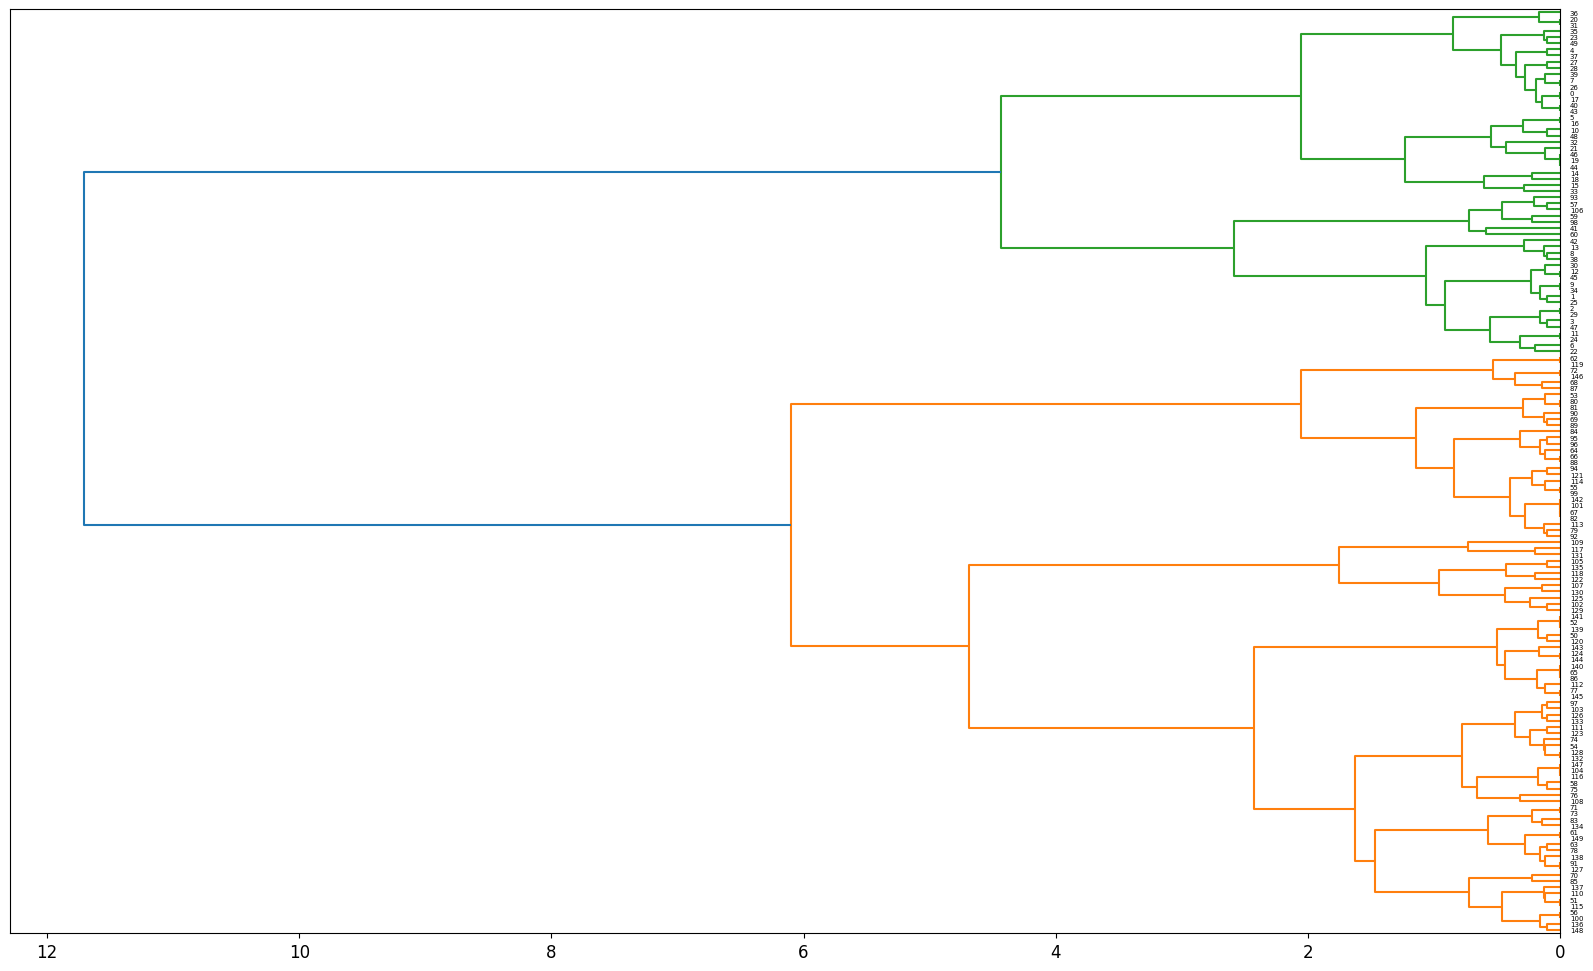

In [20]:
# визуализируем расстояния между кластерами (метод Уорда)

# рассчитаем расстояния между кластерами
linked = linkage(df_iris[['sepal length (cm)','sepal width (cm)']], 'ward')

plt.figure(figsize=(20, 12))

# сначала будут отрисовываться кластеры с минимальным расстоянием между ними
dendrogram(Z=linked,
            orientation='left',
            labels=df.index,
            distance_sort='descending')

plt.show()

In [31]:
# построим модель LDA по всем признакам
from sklearn.model_selection import cross_val_score

df_iris_all = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                 columns = iris['feature_names'] + ['target'])

df_iris_all['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df_iris_all.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']

df_iris_all.head()

,s_length,s_width,p_length,p_width,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [35]:
#  сформируем выборки

X_all = df_iris_all[['s_length', 's_width', 'p_length', 'p_width']]
y_all = df_iris_all['species']

In [43]:
# разделим данные на выборку для обучения и тестирования

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, train_size=0.25)
# построим модель LDA

lda_all = LinearDiscriminantAnalysis()
lda_all.fit(X_train_all, y_train_all)

# прогноз на тестовой выборке
y_pred_all = lda_all.predict(X_test_all)

# print(y_pred_all)

In [42]:
# точность модели LDA_all

print( 'accuracy', accuracy_score(y_test_all, y_pred_all) )
print( 'precision', precision_score(y_test_all, y_pred_all, average='weighted') )
print( 'recall', recall_score(y_test_all, y_pred_all, average='weighted') )
print( 'f1', f1_score(y_test_all, y_pred_all, average='weighted') )

accuracy 0.9333333333333333
precision 0.9335164835164835
recall 0.9333333333333333
f1 0.9333096127616676


In [44]:
#  модель, c использованием повторной кросс-валидации
#  https://www.statology.org/linear-discriminant-analysis-in-python/

model = LinearDiscriminantAnalysis()
model.fit(X_all, y_all)


LinearDiscriminantAnalysis()

In [38]:
#Определение метода оценки модели - 10 сгибов и 3 повтора:
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X_all, y_all, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.9800000000000001
